### Codes from: https://www.kaggle.com/code/manoharsrinivas/reducing-telecom-churn-with-pca-and-modeling

#### Data Preprocessing 

In [89]:
# Importing modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [90]:
#importing datasets
train_df = pd.read_csv("customer_churn_dataset-training-master.csv")
test_df = pd.read_csv("customer_churn_dataset-testing-master.csv")

# Combinding the datasets 
df = pd.concat([train_df, test_df])

In [91]:
# Inspecting the data
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [92]:
# Checking what kind of variables we have 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505207 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 50.1+ MB


In [93]:
# Checking for missing values 
df.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [94]:
# Handling missing values 
df.dropna(inplace=True)

In [95]:
# Checking for outliers 
df.describe()

# we are checking on 25% - 50% - 75% - 100%. We are seeing a steady increase in all values for the numerical variables
# This is a clear indication that there are no outliers wihtin our data 

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [96]:
# Dropping 'CustomerID'
# This variable does not yield any importance for our purpose
df.drop(columns='CustomerID', inplace=True)

In [97]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [47]:
# Creating dummy variables for the categorical variables
df = pd.get_dummies(df, columns=['Subscription Type'], prefix='Subscription Type')
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender')
df = pd.get_dummies(df, columns=['Contract Length'], prefix='Contract Length')

In [48]:
df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Gender_Female,Gender_Male,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,0,0,1,1,0,1,0,0
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,1,0,0,1,0,0,1,0
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,1,0,0,1,0,0,0,1
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,0,0,1,0,1,0,1,0
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,1,0,0,0,1,0,1,0


In [49]:
# Normalizing the numerical variables
norm = df[['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']]
normalized = (norm - norm.mean())/norm.std()
df.drop(columns=['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction'], inplace=True)
df = pd.concat([df, normalized], axis=1)

In [50]:
df.head()

,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Gender_Female,Gender_Male,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
0,1.0,0,0,1,1,0,1,0,0,-0.765882,0.443775,-0.198951,0.372313,0.532843,1.271515,0.277572
1,1.0,1,0,0,1,0,0,1,0,1.996423,1.023906,-1.707190,1.967921,-0.650423,-0.257105,-1.000267
2,1.0,1,0,0,1,0,0,0,1,1.207193,-1.006553,-1.359135,0.691435,0.532843,-1.773496,-1.348768
3,1.0,0,0,1,0,1,0,1,0,1.443962,0.385762,0.613177,1.010557,-0.768749,-0.913392,1.671578
4,1.0,1,0,0,0,1,0,1,0,-1.318343,0.037683,0.497159,0.372313,-0.650423,-0.012526,0.626073


In [51]:
# Checking the chrun rate 
churn = (sum(df['Churn'])/len(df['Churn'].index))*100
churn

55.52032240313852

We have a churn rate of 56%, which is much higher than the standard (approx. 25%)

In [54]:
# Splitting the data 
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['Churn'],axis=1)
# Putting response variable to y
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=9)

In [56]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [57]:
pca.components_

array([[ 5.90555003e-03, -3.46018110e-03, -2.44536892e-03,
         5.32665825e-02, -5.32665825e-02, -4.93015010e-02,
         1.00977674e-01, -5.16761731e-02,  3.60304282e-01,
        -4.70552032e-02, -8.03326484e-02,  5.83551648e-01,
         4.53203285e-01, -4.99271549e-01,  2.12815492e-01],
       [-1.11170460e-02,  6.74875006e-03,  4.36829594e-03,
        -7.39670115e-03,  7.39670115e-03, -3.38212508e-03,
         2.92765707e-03,  4.54468014e-04,  1.20838987e-02,
        -7.19278151e-01,  6.89852812e-01,  1.29033529e-03,
        -1.37957051e-02, -1.36599608e-02,  7.68087352e-02],
       [ 3.11897738e-03, -1.17996223e-03, -1.93901515e-03,
        -1.29719215e-01,  1.29719215e-01,  2.54134230e-03,
        -5.76888543e-03,  3.22754313e-03, -1.80676174e-01,
         1.78989151e-01,  8.23836301e-02, -6.42701992e-02,
        -8.04573615e-02,  6.19045590e-02,  9.38283825e-01],
       [-1.15087761e-02,  7.52381682e-03,  3.98495929e-03,
        -2.46805441e-02,  2.46805441e-02,  2.31495862

In [58]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.005906,-0.011117,Subscription Type_Basic
1,-0.003460,0.006749,Subscription Type_Premium
2,-0.002445,0.004368,Subscription Type_Standard
3,0.053267,-0.007397,Gender_Female
4,-0.053267,0.007397,Gender_Male


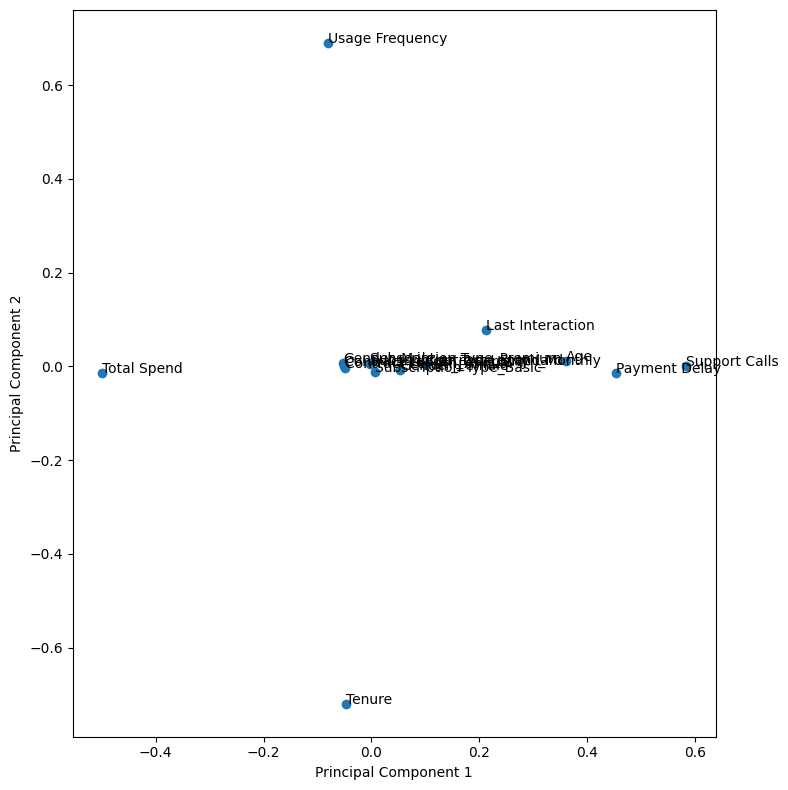

In [59]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [60]:
pca.explained_variance_ratio_

array([1.66642449e-01, 1.15983571e-01, 1.13140935e-01, 1.10780771e-01,
       1.07623159e-01, 9.87505711e-02, 8.71473159e-02, 5.32605189e-02,
       4.44751729e-02, 3.82902720e-02, 3.73373084e-02, 2.65679560e-02,
       8.26338871e-37, 2.19020512e-37, 9.46670254e-39])

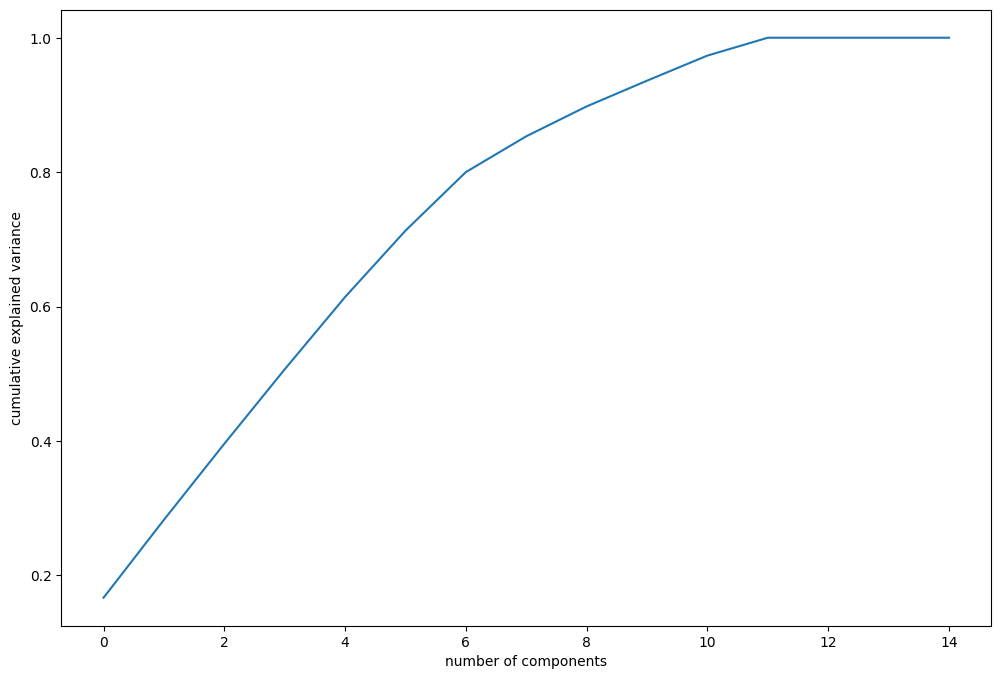

In [61]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [64]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=11)

In [65]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(353644, 11)

In [66]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

<AxesSubplot: >

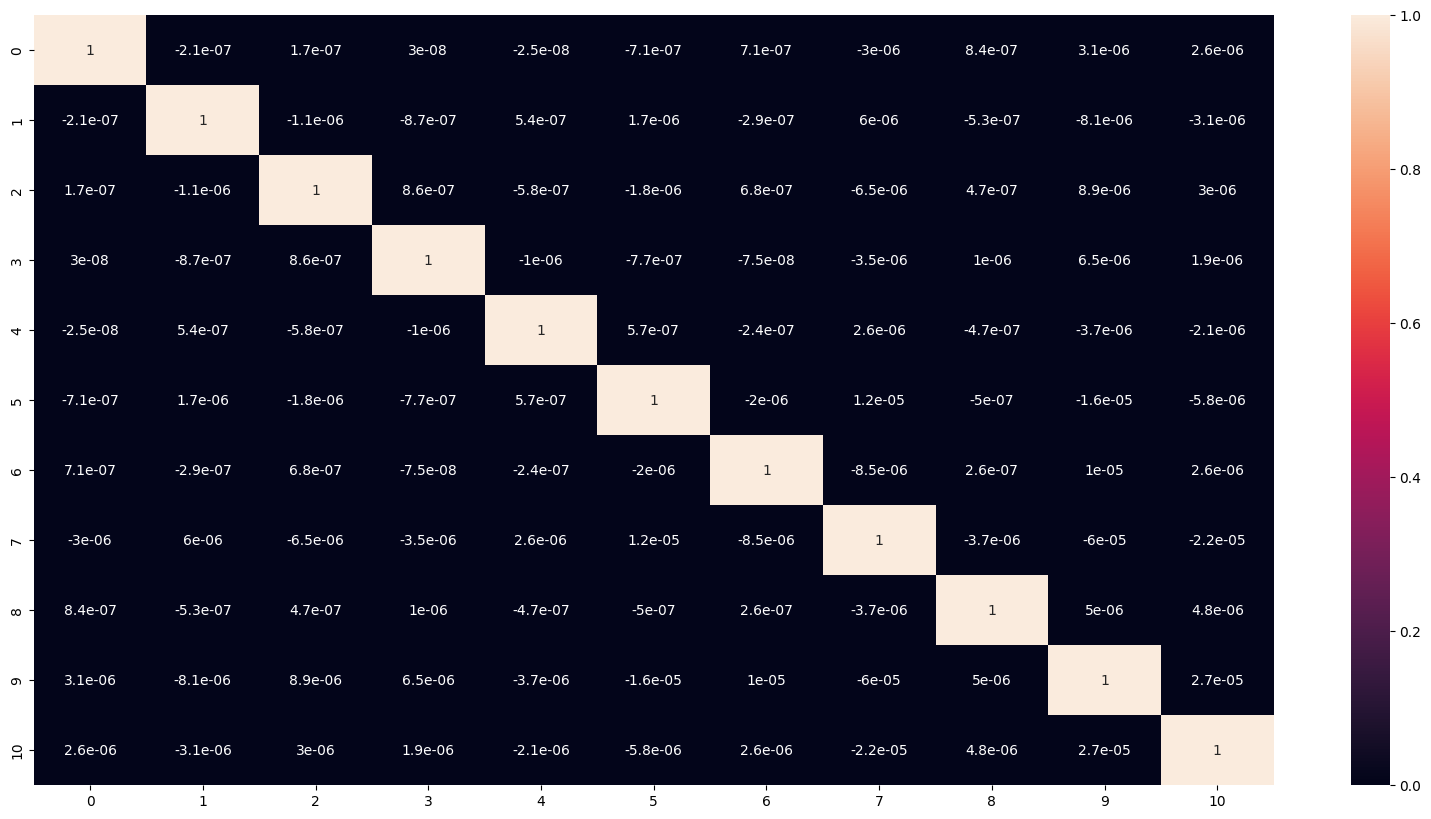

In [67]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [68]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 2.6937565603039003e-05 , min corr:  -6.037002643209891e-05


In [69]:
#Applying selected components to the test data - 11 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(151562, 11)

In [70]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [80]:
print(df_test_pca)

[[-6.91691469e-01  1.70871953e+00 -4.53261339e-02 ...  7.24310536e-01
  -8.37054154e-03  8.02122960e-01]
 [-1.84033706e+00  2.02576360e+00 -9.70971955e-01 ... -7.13959810e-01
  -6.29532536e-03  8.16914104e-01]
 [ 1.49603037e+00  7.69565247e-01 -1.49178153e+00 ... -7.29981227e-01
  -7.06677213e-01 -4.28327377e-01]
 ...
 [ 2.03758184e+00 -5.78038872e-02  4.47201652e-01 ...  7.04482755e-01
   7.02043024e-01 -4.17168414e-01]
 [ 3.41793310e-01 -4.45522964e-01 -1.77074861e+00 ... -1.13162409e-02
   3.90828264e-03  8.78618547e-01]
 [-3.48023350e-01 -1.00262232e+00  1.38298952e+00 ...  5.01352892e-03
   1.35540258e-03  8.52225439e-01]]


In [81]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

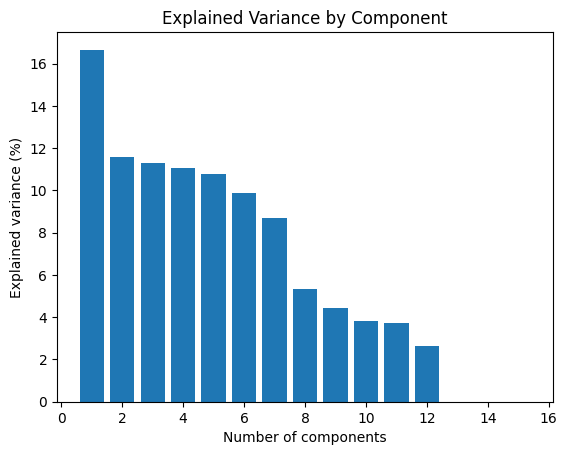

In [75]:
components = None
components = len(pca.explained_variance_ratio_) if components is None else components

# Create a bar chart
plt.bar(range(1, components + 1), pca.explained_variance_ratio_ * 100)

plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.title("Explained Variance by Component")

# Show the bar chart
plt.show()

### Trying out codes from Johannes for PCA after dummy and normalization 

In [82]:
components = None
pca = PCA(n_components = 0.85) #or n_components = desired % of variance explained
# perform PCA on the scaled data
pca.fit(X_train)

print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[16.66424488 11.59835708 11.31409351 11.07807714 10.76231587  9.87505711
  8.71473159  5.32605189]



In [83]:
#get cumulative variance
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[16.66424488 28.26260196 39.57669547 50.65477261 61.41708848 71.29214559
 80.00687718 85.33292907]



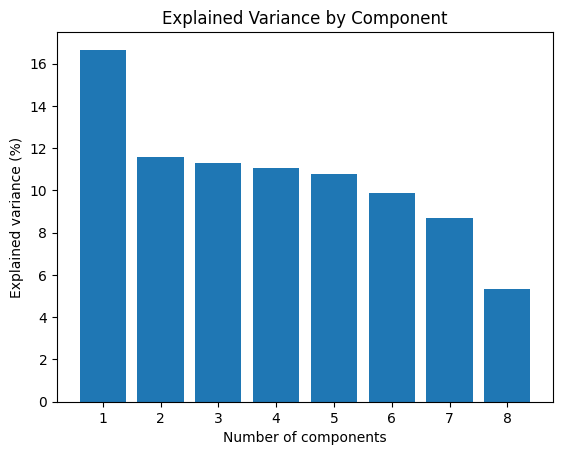

In [84]:
# Number of components you want to display
components = len(pca.explained_variance_ratio_) if components is None else components

# Create a bar chart
plt.bar(range(1, components + 1), pca.explained_variance_ratio_ * 100)

plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.title("Explained Variance by Component")

# Show the bar chart
plt.show()

In [85]:
#how much each feature contribures to each component
pca_components = abs(pca.components_)
print(pca_components)

[[5.90555003e-03 3.46018110e-03 2.44536892e-03 5.32665825e-02
  5.32665825e-02 4.93015010e-02 1.00977674e-01 5.16761731e-02
  3.60304282e-01 4.70552032e-02 8.03326484e-02 5.83551648e-01
  4.53203285e-01 4.99271549e-01 2.12815492e-01]
 [1.11170460e-02 6.74875006e-03 4.36829594e-03 7.39670115e-03
  7.39670115e-03 3.38212508e-03 2.92765707e-03 4.54468014e-04
  1.20838987e-02 7.19278151e-01 6.89852812e-01 1.29033529e-03
  1.37957051e-02 1.36599608e-02 7.68087352e-02]
 [3.11897738e-03 1.17996223e-03 1.93901515e-03 1.29719215e-01
  1.29719215e-01 2.54134230e-03 5.76888543e-03 3.22754313e-03
  1.80676174e-01 1.78989151e-01 8.23836301e-02 6.42701992e-02
  8.04573615e-02 6.19045590e-02 9.38283825e-01]
 [1.15087761e-02 7.52381682e-03 3.98495929e-03 2.46805441e-02
  2.46805441e-02 2.31495862e-03 3.46298382e-03 1.14802520e-03
  6.46060407e-04 6.62153382e-01 7.11322791e-01 4.58344024e-02
  1.53155288e-01 4.65418986e-02 1.62502363e-01]
 [1.19766805e-03 6.61967227e-04 5.35700820e-04 2.90027333e-02
  

In [87]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {train_df.columns[indices].to_list()}')

Top 4 most important features in each component


IndexError: index 13 is out of bounds for axis 0 with size 12

In [88]:
# Create a DataFrame to store feature contributions to each principal component
feature_contributions = pd.DataFrame(
    data=pca.components_,
    columns=X.columns,  # Assuming X is a DataFrame with column names
    index=[f'PC{i+1}' for i in range(len(pca.components_))]
)

# Display the top N features contributing to each principal component (e.g., top 5)
num_top_features = 6
for pc in feature_contributions.index:
    top_features = feature_contributions.loc[pc].abs().sort_values(ascending=False).head(num_top_features)
    print(f"Top {num_top_features} Features for {pc}:")
    print(top_features)
    print()

Top 6 Features for PC1:
Support Calls              0.583552
Total Spend                0.499272
Payment Delay              0.453203
Age                        0.360304
Last Interaction           0.212815
Contract Length_Monthly    0.100978
Name: PC1, dtype: float64

Top 6 Features for PC2:
Tenure              0.719278
Usage Frequency     0.689853
Last Interaction    0.076809
Payment Delay       0.013796
Total Spend         0.013660
Age                 0.012084
Name: PC2, dtype: float64

Top 6 Features for PC3:
Last Interaction    0.938284
Age                 0.180676
Tenure              0.178989
Gender_Male         0.129719
Gender_Female       0.129719
Usage Frequency     0.082384
Name: PC3, dtype: float64

Top 6 Features for PC4:
Usage Frequency     0.711323
Tenure              0.662153
Last Interaction    0.162502
Payment Delay       0.153155
Total Spend         0.046542
Support Calls       0.045834
Name: PC4, dtype: float64

Top 6 Features for PC5:
Age                 0.854888
Payme

### PCA; Codes from a paper

https://nextjournal.com/pc-methods/calculate-pc-mixed-data

In [54]:
# Importing modules 
import pandas as pd 
import prince 
import pprint 

In [55]:
#importing datasets
train_df_pca = pd.read_csv("customer_churn_dataset-training-master.csv")
test_df_pca = pd.read_csv("customer_churn_dataset-testing-master.csv")

In [58]:
train_df_pca.dropna(inplace=True)

In [61]:
## Instantiate FAMD object
famd = prince.FAMD(
     n_components=25,
     n_iter=10,
     copy=True,
     check_input=True,
     engine='sklearn',       ## Can be "auto", 'sklearn', 'fbpca'
     random_state=42)

In [62]:
## Fit FAMD object to data 
famd = famd.fit(train_df_pca.drop('Churn', axis=1)) ## Exclude target variable "Churn"

In [69]:
# Calculate explained variance for each component
explained_variance = famd.eigenvalues_ / famd.eigenvalues_.sum()
for i, variance in enumerate(explained_variance):
    print(f"Component {i + 1}: Explained Variance = {variance:.4f}")

Component 1: Explained Variance = 0.1555
Component 2: Explained Variance = 0.0979
Component 3: Explained Variance = 0.0970
Component 4: Explained Variance = 0.0967
Component 5: Explained Variance = 0.0965
Component 6: Explained Variance = 0.0727
Component 7: Explained Variance = 0.0662
Component 8: Explained Variance = 0.0624
Component 9: Explained Variance = 0.0611
Component 10: Explained Variance = 0.0588
Component 11: Explained Variance = 0.0566
Component 12: Explained Variance = 0.0492
Component 13: Explained Variance = 0.0294
Component 14: Explained Variance = 0.0000
Component 15: Explained Variance = 0.0000
Component 16: Explained Variance = 0.0000


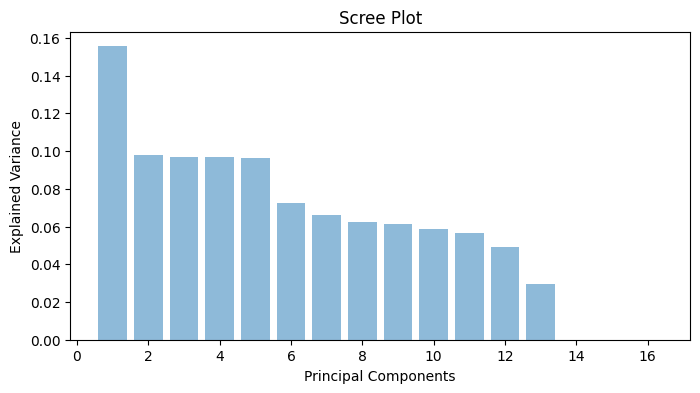

In [70]:
import matplotlib.pyplot as plt

# Calculate explained variance for each component
explained_variance = famd.eigenvalues_ / famd.eigenvalues_.sum()

# Create a Scree Plot
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

### PCA

I should normalize the data 

In [19]:
# Importing modules 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [20]:
#importing datasets
train_df_pca = pd.read_csv("customer_churn_dataset-training-master.csv")
test_df_pca = pd.read_csv("customer_churn_dataset-testing-master.csv")

In [23]:
train_df_pca.dropna(inplace=True)

In [24]:
# Defining the categorical and numerical variables
num = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
cat = ['Gender', 'Subscription Type', 'Contract Length']

In [25]:
# Creating transformers for numerical and categorical features
numeric_tf = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_tf = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  # One-hot encode categorical features
])

# Combinding the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_tf, num),
        ('cat', categorical_tf, cat)
    ])

In [26]:
# Preporcessing and transforming the data 
X_train_pca = preprocessor.fit_transform(train_df_pca.drop(columns=['CustomerID', 'Churn']))
X_test_pca = preprocessor.transform(test_df_pca.drop(columns=['CustomerID', 'Churn']))

In [49]:
# Perform PCA
n_components =5  # You can adjust this based on your needs

pca = PCA(n_components=n_components)
pca.fit(X_train_pca)

train_pca = pca.transform(X_train_pca)
test_pca = pca.transform(X_test_pca)

In [50]:
# Explained Variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.18155302 0.12690841 0.12183684 0.11974434 0.11635072]


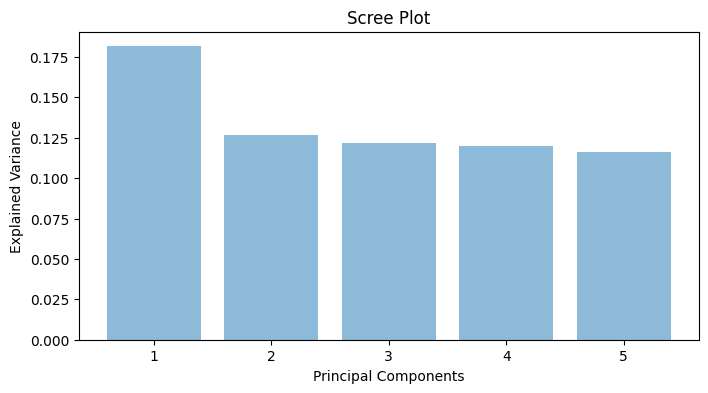

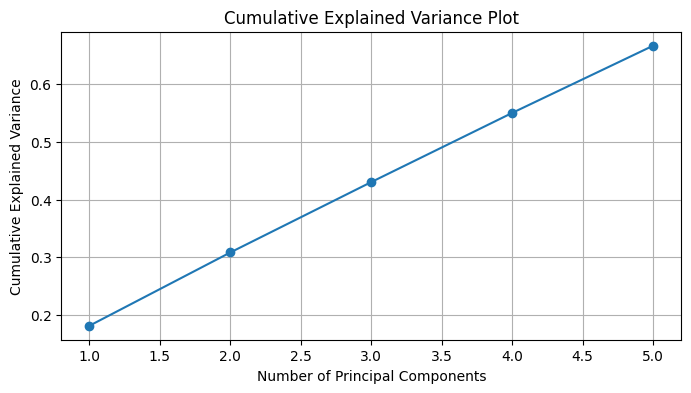

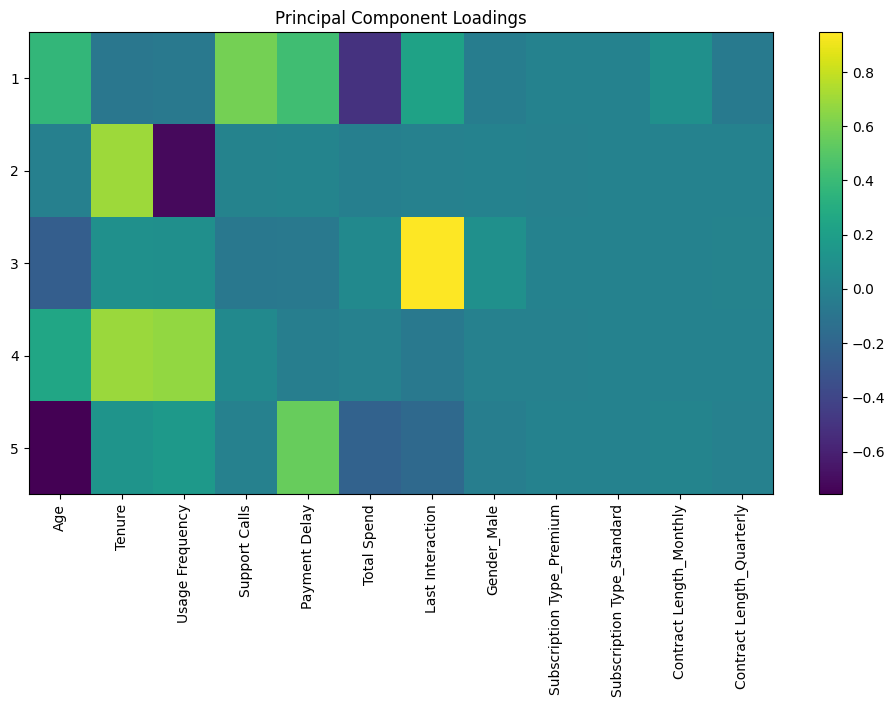

In [51]:
# Visualizations
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

# Manually get feature names for one-hot encoded categorical columns
categorical_encoder = preprocessor.named_transformers_['cat']['onehot']
cat_feature_names = categorical_encoder.get_feature_names_out(input_features=cat)
all_feature_names = num + list(cat_feature_names)

# Create DataFrame for component loadings
components_df = pd.DataFrame(pca.components_, columns=all_feature_names)
plt.figure(figsize=(12, 6))
plt.imshow(components_df, cmap='viridis', aspect='auto')
plt.colorbar()
plt.xticks(range(len(components_df.columns)), components_df.columns, rotation=90)
plt.yticks(range(len(components_df.index)), range(1, len(components_df.index) + 1))
plt.title('Principal Component Loadings')
plt.show()

### Logistic Regression 

In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [72]:
# Evaluation function that prints classification report and confusion matrix
def evaluate(y_test, y_pred, model_name):
    # Creating the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Priting the model name
    print(f"\033[34m{model_name}\033[0m")

    # Print the classification report
    print(f" \033[32mClassification Report:\033[0m")
    print(classification_report(y_test, y_pred))
    print(f" \033[32mConfusion Matrix:\033[0m")
    
    # Print the confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'{model_name}: Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [3]:
#importing datasets
train_df = pd.read_csv("customer_churn_dataset-training-master.csv")
test_df = pd.read_csv("customer_churn_dataset-testing-master.csv")

In [4]:
# Inspecting the data 
train_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
test_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [6]:
#figure out how many different values are in the columns with string datatype

unique_gender = train_df["Gender"].unique()

print("Unique values in Gender column:", unique_gender)

unique_subtype = train_df["Subscription Type"].unique()

print("Unique values in Subscription Type column:", unique_subtype)

unique_contractLenght = train_df["Contract Length"].unique()

print("Unique values in Contract Length column:", unique_contractLenght)

Unique values in Gender column: ['Female' 'Male' nan]
Unique values in Subscription Type column: ['Standard' 'Basic' 'Premium' nan]
Unique values in Contract Length column: ['Annual' 'Monthly' 'Quarterly' nan]


In [7]:
# Seeing how many missing values there are
print(train_df.isna().sum())
print(test_df.isna().sum())

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [8]:
# Since there are only one missing value, it is feasible to drop this 
train_df.dropna(inplace=True)

In [9]:
# Defining the categorical and numerical variables
num = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
cat = ['Gender', 'Subscription Type', 'Contract Length']

In [10]:
# Creating transformers for numerical and categorical features
numeric_tf = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_tf = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  # One-hot encode categorical features
])

# Combinding the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_tf, num),
        ('cat', categorical_tf, cat)
    ])

In [11]:
# Apply the preprocessing to train and test data
X_train = preprocessor.fit_transform(train_df.drop(columns=['CustomerID', 'Churn']))
y_train = train_df['Churn']
X_test = preprocessor.transform(test_df.drop(columns=['CustomerID', 'Churn']))
y_test = test_df['Churn']

In [12]:
# Initialising Logistic Regression 
lr = LogisticRegression(max_iter=1000000, random_state=9)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000000, random_state=9)

LogisticRegression(max_iter=1000000, random_state=9)
 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.19      0.32     33881
           1       0.53      0.99      0.69     30493

    accuracy                           0.57     64374
   macro avg       0.74      0.59      0.50     64374
weighted avg       0.75      0.57      0.49     64374

 Confusion Matrix:


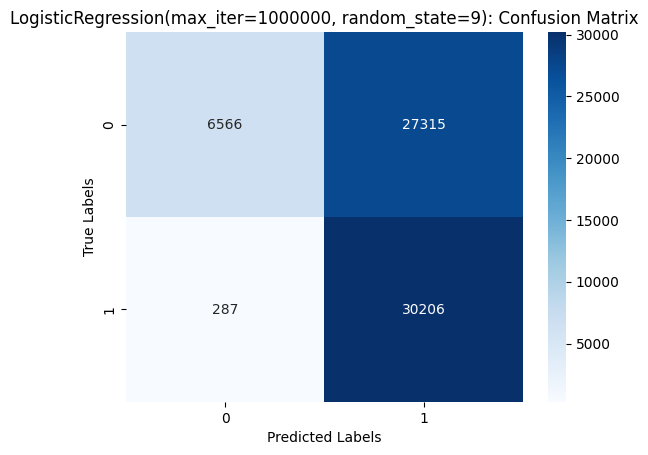

In [17]:
# Evaluating the results 
evaluate(y_test, y_pred, lr)